<a href="https://colab.research.google.com/github/valenciajaime/MN2022_colabs/blob/main/Anteriores/Circuito_RLserie_MN2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejemplo de solucion numerica de una ecuacion diferencial ordinaria con condiciones iniciales.

Caso respuesta dinamica de un circuito electrico RL serie con fuente senosoidal.

# [**Efecto corriente "inrush"**](https://en.wikipedia.org/wiki/Inrush_current)

Uso de odeint() del modulo scipy.
Comparacion con funciones propias de solucion.


Jaime A. Valencia 
jalejandro.valencia@udea.edu.co

14-Nov-2020 sabado

# Modulo y funciones
Se importaran los modulos para la solucion numerica de ecuaciones diferenciales ordinarias y se programaran las funciones requeridas.


In [ ]:
import  matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint


def RLserie(y, t, R = 4, L = 0.7, v = lambda x:100 ):
    """y: funcion dependiente de t
    t: variable independiente
    Funcion para solucion de un circuito
    vf = R i + L di/dt
    """
    vf = v(t)
    di = (vf - R*y)/L
    return di

def Fvsin01(t, Amp=20, fq = 60, afi= 60):
    """t: tiempo,   Amp: ampltud; fq:frecuencia en Hz; afi: angulo desface en grados
       Fueno senoidal con angulo de desface
       vf(t) = amp * cos( 2*pi*fq*t - afi)
    """
    angulo = afi*np.pi/180
    wo = 2*np.pi*fq
    v = Amp * np.cos(wo*t - angulo)
    return v


# Solucion de la ED

In [ ]:
#Definir parametros
R=4.
L=0.7


#definir condicion inicial
Io = 0.0
print('Corriente inicial (cir RL): ', Io)

##definir rango de solucion

t_inicial = 0
t_final= 0.2
T = np.linspace(t_inicial, t_final, 200)

print('Solucion entre ',t_inicial,' y ',t_final, 'segundos')


##Solucionar la ED
y_cor = odeint(RLserie, Io, T,(R,L,Fvsin01))

print("Lista solucion y_cor ",len(y_cor))


Corriente inicial (cir RL):  0.0
Solucion entre  0  y  0.2 segundos
Lista solucion y_cor  200


# Grafico de la respuesta

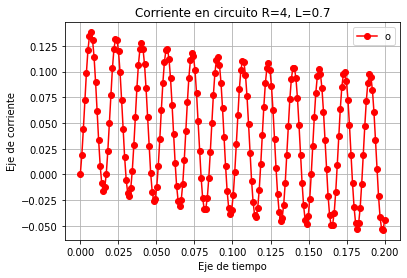

In [ ]:
plt.plot(T, y_cor, 'ro-')
plt.title('Corriente en circuito R=4, L=0.7')
plt.xlabel('Eje de tiempo')
plt.ylabel('Eje de corriente')
plt.legend( ('odeint') )
plt.grid(True)
plt.show()